# Сегментация клиентской базы телекоммуникационной компании

**Задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('telecom.csv')

In [3]:
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


# Предобработка

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [5]:
df.isna().mean() 

Возраст                                  0.000000
Среднемесячный расход                    0.005343
Средняя продолжительность разговоров     0.003785
Звонков днем за месяц                    0.004452
Звонков вечером за месяц                 0.000668
Звонков ночью за месяц                   0.000000
Звонки в другие города                   0.000000
Звонки в другие страны                   0.000000
Доля звонков на стационарные телефоны    0.000000
Количество SMS за месяц                  0.000000
Дата подключения тарифа                  0.000000
dtype: float64

In [6]:
df = df.dropna()

Так как доля пропусков мала, удалил эти строки

In [7]:
df.columns = ['age', 'average_monthly_expense', 'mean_call_length', 'daily_calls_month', 'evening_calls_month',
       'night_calls_month', 'other_cities_calls', 'rouming_calls', 'calls_to_stationary',
       'sms_month', 'tariff_activation_date']

In [8]:
df.tariff_activation_date = pd.to_datetime(df.tariff_activation_date)

In [9]:
col = ['daily_calls_month', 'evening_calls_month', 'night_calls_month', 'other_cities_calls', 'calls_to_stationary', 'sms_month']

In [10]:
for column in col:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype('int64')

Изменил названия признаков, поменял типы данных.

In [11]:
df.duplicated().sum()

0

In [12]:
percentiles = [.01, .1, .25, .75, .90, .99]
df.describe(percentiles=percentiles)

,age,average_monthly_expense,mean_call_length,daily_calls_month,evening_calls_month,night_calls_month,other_cities_calls,rouming_calls,calls_to_stationary,sms_month
count,4430.00000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000
mean,41.88307,506.384546,4.226309,63.907223,70.293905,6.259819,8.675621,0.395485,10.330023,21.157788
std,13.07620,648.257234,3.008247,63.004533,41.222571,14.674491,13.496250,1.177910,9.246890,27.766154
min,19.00000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,19.00000,7.778700,0.400000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,23.00000,33.584000,1.300000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.00000,152.880000,2.000000,37.000000,41.250000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,43.00000,315.155000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000
75%,52.00000,599.960000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000
90%,58.00000,1068.441000,8.300000,104.000000,128.000000,19.000000,31.000000,1.000000,23.000000,57.100000


Аномальных значений для последующей обработки не обнаружил

# Анализ

In [13]:
df['age_group'] = pd.cut(df.age, bins=[18, 24, 33, 56, 70])

In [14]:
df.groupby('age_group')['average_monthly_expense'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,231.075127,136.76
"(24, 33]",819,701.154933,463.74
"(33, 56]",2449,515.010331,337.74
"(56, 70]",651,445.004547,227.03


<Axes: xlabel='age_group'>

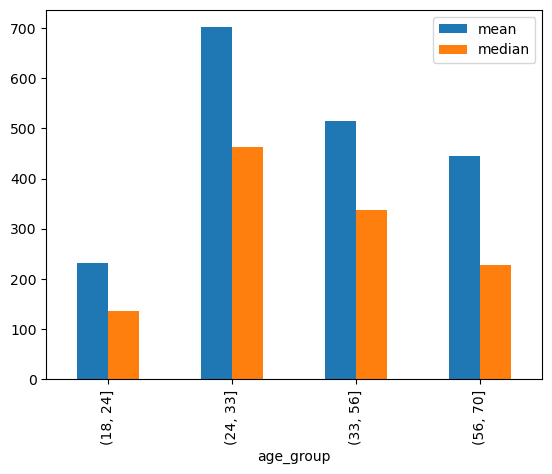

In [15]:
df.groupby('age_group')['average_monthly_expense'].agg(['mean', 'median']).plot(kind='bar')

Группа молодых людей в возрасте 24-33 года тратят больше всех

In [16]:
df.groupby('age_group')['mean_call_length'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,2.821918,2.4
"(24, 33]",819,5.369353,4.4
"(33, 56]",2449,4.270621,3.4
"(56, 70]",651,3.723963,2.8


<Axes: xlabel='age_group'>

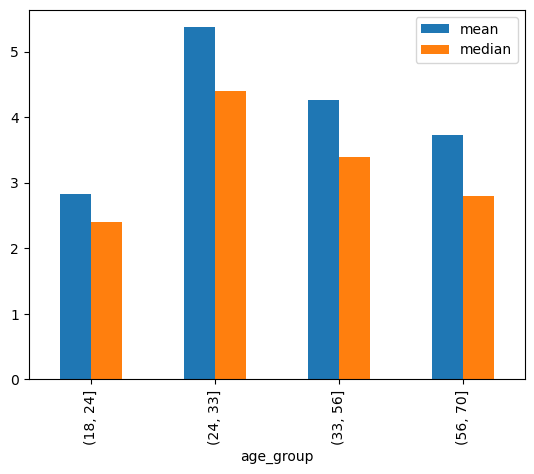

In [17]:
df.groupby('age_group')['mean_call_length'].agg(['mean', 'median']).plot(kind='bar')

Аналогичная ситуация со средней продолжительностью звонков. Но относительный разрыв между группами заметно уменьшился

In [18]:
df.groupby('age_group')['daily_calls_month'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,37.888454,35.0
"(24, 33]",819,80.495726,63.0
"(33, 56]",2449,65.643528,55.0
"(56, 70]",651,56.929339,44.0


<Axes: xlabel='age_group'>

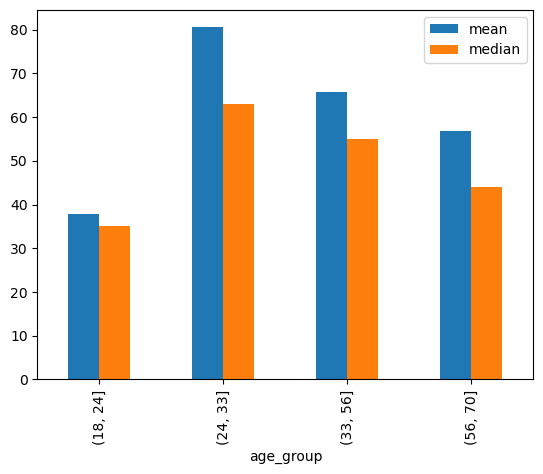

In [19]:
df.groupby('age_group')['daily_calls_month'].agg(['mean', 'median']).plot(kind='bar')

По дневным звонкам ситуация схожа со средней продолжительностью вызова

In [20]:
df.groupby('age_group')['evening_calls_month'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,68.589041,70.0
"(24, 33]",819,85.327228,85.0
"(33, 56]",2449,69.821151,69.0
"(56, 70]",651,54.497696,52.0


<Axes: xlabel='age_group'>

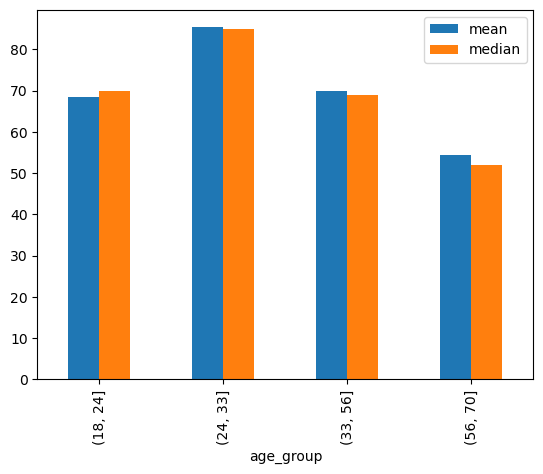

In [21]:
df.groupby('age_group')['evening_calls_month'].agg(['mean', 'median']).plot(kind='bar')

Но вот с вечерними звонками ситуация меняется, видим более сглаженную картину по возрастным группам. Самые молодые пользователи проявляют более высокую активность в вечернее время. Причем медианное значение сравнивается со средним, что говорит нам о симметричности данной выборки

In [22]:
df.groupby('age_group')['night_calls_month'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,9.954990,7.0
"(24, 33]",819,14.293040,3.0
"(33, 56]",2449,3.909759,0.0
"(56, 70]",651,2.093702,0.0


<Axes: xlabel='age_group'>

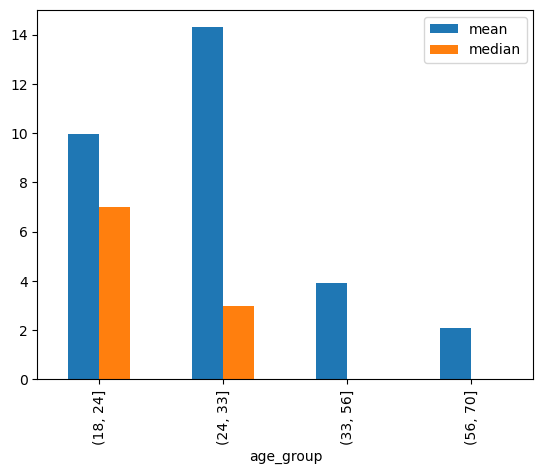

In [23]:
df.groupby('age_group')['night_calls_month'].agg(['mean', 'median']).plot(kind='bar')

Что касается ночных разговоров, картина выглядит достаточно ожидаемо. Зрелые и пожилые люди ночью предпочитают спать, причем как минимум половина пользователей этих возрастных групп не совершили ни одного звонка. В среднем, в данной метрике снова лидирует возростная группа 24-33, но медиана на гораздо меньшем уровне, то есть большое количество пользователей этой группы, проявляет слабую активность ночью. Наиболее отличная ситуация у самых молодых людей, с самой выраженной активностью в ночное время

In [24]:
df.groupby('age_group')['other_cities_calls'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,1.050881,0.0
"(24, 33]",819,11.257631,5.0
"(33, 56]",2449,9.868926,3.0
"(56, 70]",651,6.923195,0.0


<Axes: xlabel='age_group'>

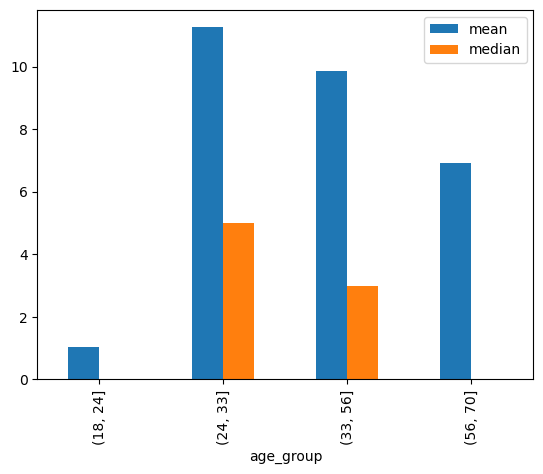

In [25]:
df.groupby('age_group')['other_cities_calls'].agg(['mean', 'median']).plot(kind='bar')

Видим, что группа 18-24 практически не звонит в другие города, к старости этот показатель также снижается. Снова самые активные пользователи в группе 24-33

In [26]:
df.groupby('age_group')['rouming_calls'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,0.111546,0.0
"(24, 33]",819,0.516484,0.0
"(33, 56]",2449,0.417313,0.0
"(56, 70]",651,0.384025,0.0


<Axes: xlabel='age_group'>

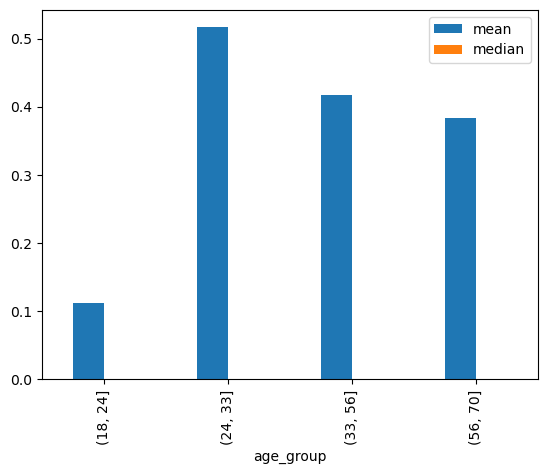

In [27]:
df.groupby('age_group')['rouming_calls'].agg(['mean', 'median']).plot(kind='bar')

In [28]:
df['rouming_calls'].value_counts()

0     3620
1      378
2      255
3      100
6       14
5       12
7       12
9        9
10       9
4        8
11       7
8        4
12       2
Name: rouming_calls, dtype: int64

Роминг-звонки практически никто не совершает. Но также лидирует группа 24-33

In [29]:
df.groupby('age_group')['calls_to_stationary'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,4.013699,3.0
"(24, 33]",819,11.307692,10.0
"(33, 56]",2449,11.236423,10.0
"(56, 70]",651,10.648233,8.0


<Axes: xlabel='age_group'>

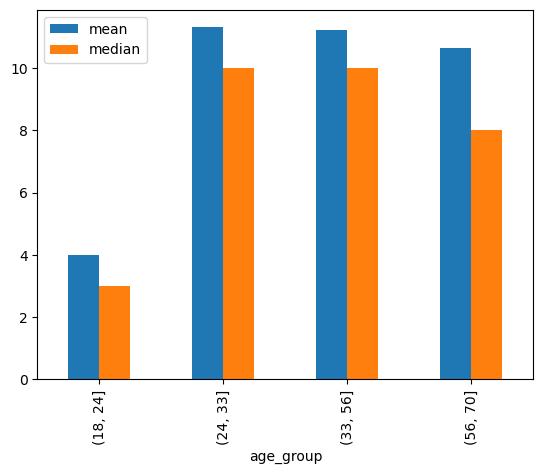

In [30]:
df.groupby('age_group')['calls_to_stationary'].agg(['mean', 'median']).plot(kind='bar')

Кроме самых молодых людей, на стационар вызовы совершают все возрастные группы с не сильно отличающимся разбросом

In [31]:
df.groupby('age_group')['sms_month'].agg(['count', 'mean', 'median'])

,count,mean,median
age_group,,,
"(18, 24]",511,48.367906,41.0
"(24, 33]",819,38.495726,28.0
"(33, 56]",2449,14.579012,5.0
"(56, 70]",651,2.735791,3.0


<Axes: xlabel='age_group'>

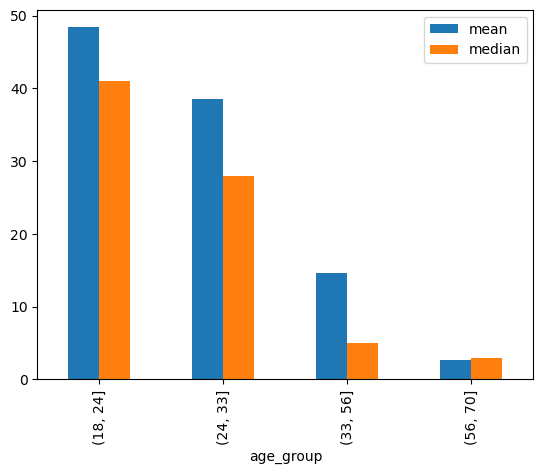

In [32]:
df.groupby('age_group')['sms_month'].agg(['mean', 'median']).plot(kind='bar')

Видим, что чем старше человек, тем меньше он пользуется отправкой сообщений, предпочитая звонки

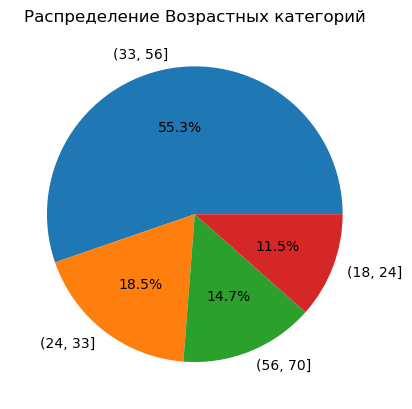

In [33]:
category_counts = df['age_group'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Распределение Возрастных категорий')
plt.show()

In [34]:
df['year'] = df['tariff_activation_date'].dt.year

In [35]:
df['month'] = df['tariff_activation_date'].dt.month

In [36]:
df['day'] = df['tariff_activation_date'].dt.day

Создали столбцы с годом, месяцем и днем подключения

<Axes: xlabel='year'>

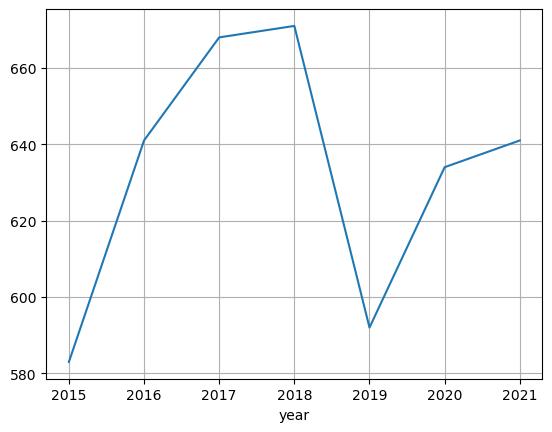

In [37]:
df.groupby('year').year.count().plot(grid=True)

<Axes: xlabel='month'>

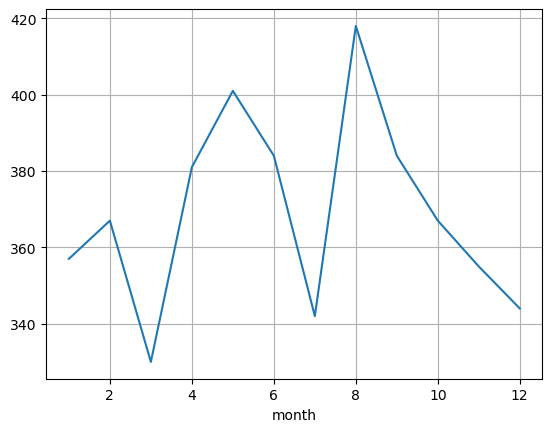

In [38]:
df.groupby('month').month.count().plot(grid=True)

<Axes: xlabel='day'>

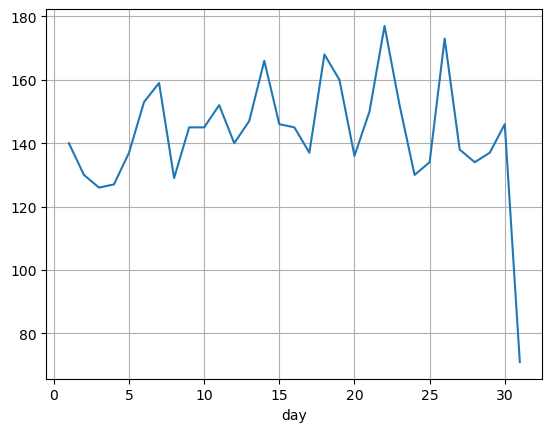

In [39]:
df.groupby('day').day.count().plot(grid=True)

Видим, что до 2018 года включительно, имеется большой прирост клиентов, затем произошел резкий спад, после чего динамика начала восстанавливаться. Пик активности приходится на август месяц, причем в конце и начале года, клиенты не активно сменяют тариф. Также и на последний день месяца, желающих подключиться крайне мало

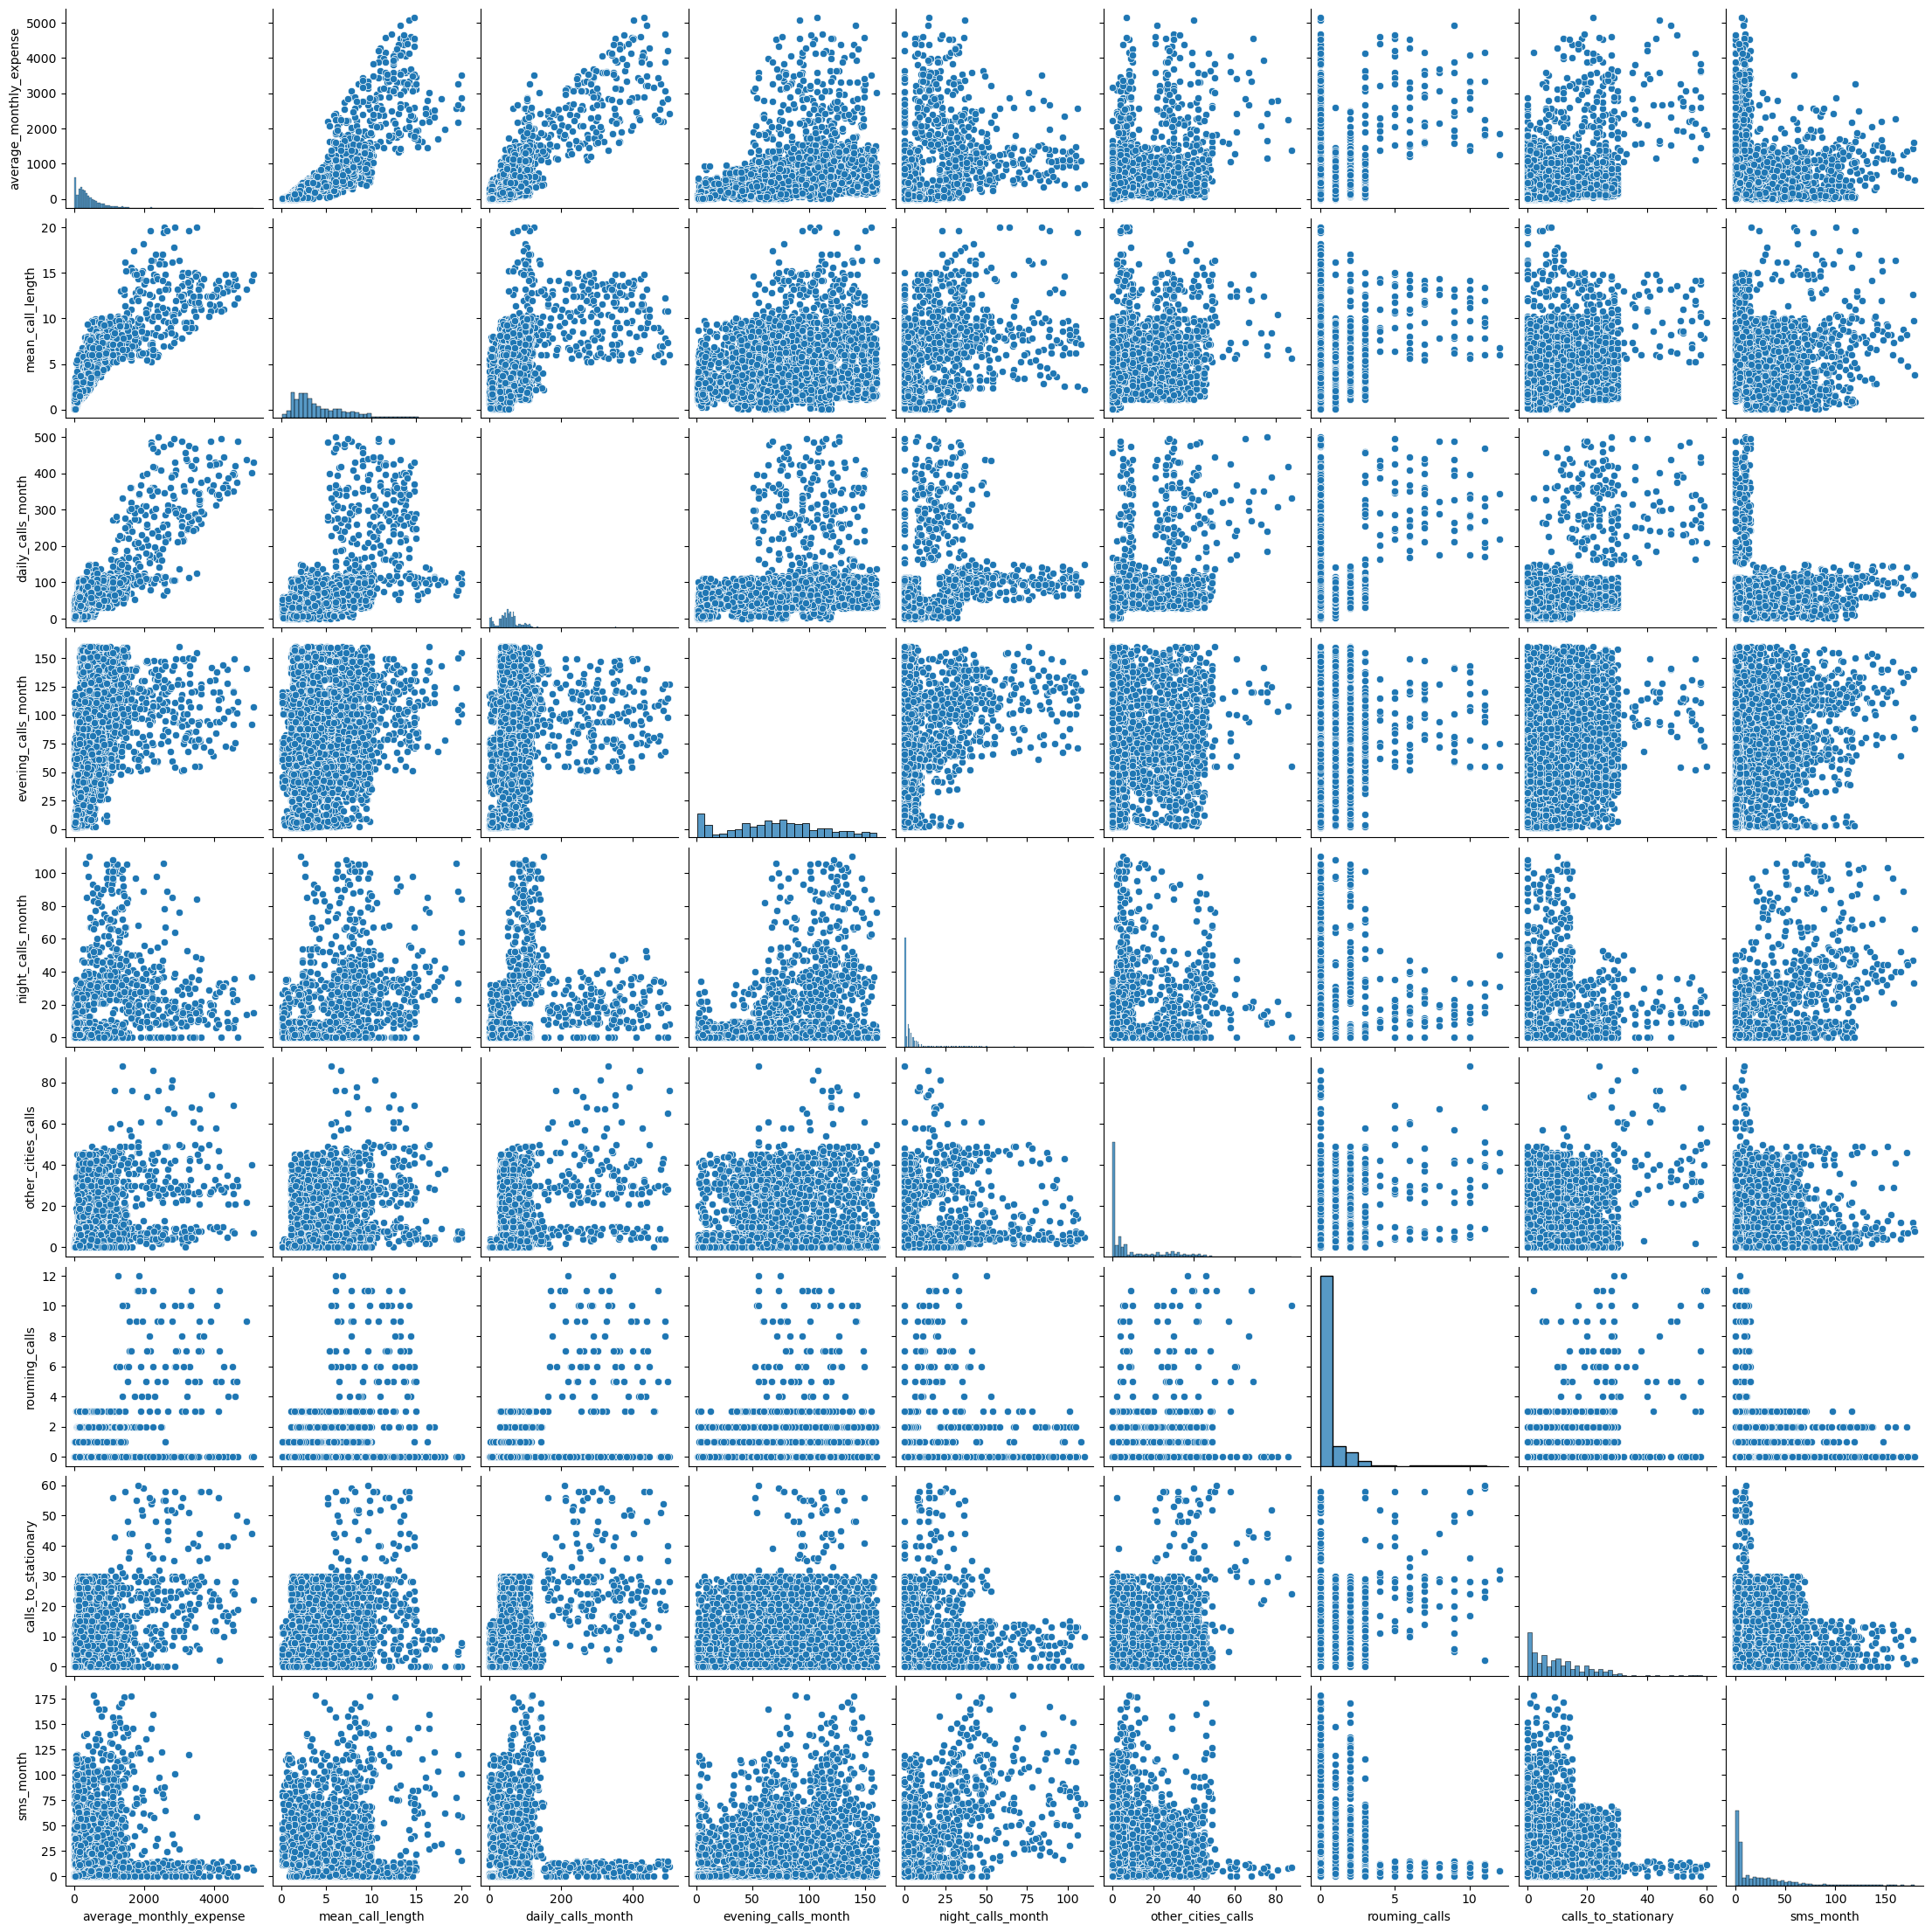

In [106]:
sns.pairplot(df[['average_monthly_expense', 'mean_call_length', 'daily_calls_month',
                 'evening_calls_month', 'night_calls_month', 'other_cities_calls',
                 'rouming_calls', 'calls_to_stationary', 'sms_month']])

По графикам можем выделить следующие закономерности: Затраты на связь, средняя продолжительность звонка и дневные звонки сильно коррелируют. Также видим, что люди отправляющие больше смс, по достижению определенного порога, начинают мало звонить днем и начинают меньше тратить на связь.

In [104]:
df.corr()

C:\Temp\ipykernel_25260\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,average_monthly_expense,mean_call_length,daily_calls_month,evening_calls_month,night_calls_month,other_cities_calls,rouming_calls,calls_to_stationary,sms_month,year,month,day
age,1.000000,-0.013307,-0.043129,-0.009287,-0.189142,-0.266851,0.029673,0.024346,0.119988,-0.593523,-0.001946,-0.020722,0.004739
average_monthly_expense,-0.013307,1.000000,0.829936,0.843692,0.420968,0.393296,0.333872,0.381707,0.358686,0.086962,-0.017485,-0.001337,-0.014963
mean_call_length,-0.043129,0.829936,1.000000,0.515518,0.321290,0.398270,0.261272,0.232568,0.240843,0.181048,-0.031792,0.004369,-0.016913
daily_calls_month,-0.009287,0.843692,0.515518,1.000000,0.313985,0.317225,0.369823,0.443721,0.419496,0.026923,-0.008673,-0.008466,-0.003430
evening_calls_month,-0.189142,0.420968,0.321290,0.313985,1.000000,0.284894,0.199456,0.116886,0.201288,0.230467,-0.037263,-0.005598,-0.008361
night_calls_month,-0.266851,0.393296,0.398270,0.317225,0.284894,1.000000,0.141972,0.128165,-0.014747,0.505892,-0.005110,-0.006137,-0.005373
other_cities_calls,0.029673,0.333872,0.261272,0.369823,0.199456,0.141972,1.000000,0.198117,0.256673,0.016603,-0.016908,-0.001291,-0.018552
rouming_calls,0.024346,0.381707,0.232568,0.443721,0.116886,0.128165,0.198117,1.000000,0.238073,-0.032636,0.006753,0.007256,0.017503
calls_to_stationary,0.119988,0.358686,0.240843,0.419496,0.201288,-0.014747,0.256673,0.238073,1.000000,-0.123561,-0.007061,-0.019779,0.001983
sms_month,-0.593523,0.086962,0.181048,0.026923,0.230467,0.505892,0.016603,-0.032636,-0.123561,1.000000,-0.023686,0.004629,0.005861


Можем разбить по кластерам предпочтения клиентов для последующей проработки предложений по тарифам

In [41]:
from sklearn.cluster import KMeans

In [109]:
df_clust = df.copy().drop('tariff_activation_date', axis=1)
df_clust['age_group'] = df_clust['age_group'].cat.rename_categories([0, 1, 2, 3])
df_clust.head()

,age,average_monthly_expense,mean_call_length,daily_calls_month,evening_calls_month,night_calls_month,other_cities_calls,rouming_calls,calls_to_stationary,sms_month,age_group,year,month,day
1,51,287.51,1.7,111,109,1,44,0,6,1,2,2021,10,21
2,41,113.70,2.1,41,27,0,0,0,1,36,2,2015,3,26
3,35,410.23,5.6,47,49,0,0,0,11,23,2,2016,1,4
4,26,537.60,4.8,58,77,4,0,0,16,29,1,2017,5,3
5,26,324.56,3.3,45,75,3,1,1,8,15,1,2016,11,13


In [110]:
kmeans = KMeans( random_state=1000)
kmeans.fit(df_clust)
df_clust['Label']=kmeans.labels_

C:\Users\TT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
df_clust

,age,average_monthly_expense,mean_call_length,daily_calls_month,evening_calls_month,night_calls_month,other_cities_calls,rouming_calls,calls_to_stationary,sms_month,age_group,year,month,day,Label
1,51,287.51,1.7,111,109,1,44,0,6,1,2,2021,10,21,2
2,41,113.70,2.1,41,27,0,0,0,1,36,2,2015,3,26,2
3,35,410.23,5.6,47,49,0,0,0,11,23,2,2016,1,4,2
4,26,537.60,4.8,58,77,4,0,0,16,29,1,2017,5,3,0
5,26,324.56,3.3,45,75,3,1,1,8,15,1,2016,11,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36,28,2,6,0,12,30,2,2021,4,10,2
4488,40,500.68,6.0,46,66,0,6,0,15,23,2,2021,9,22,0
4489,60,470.42,3.5,58,129,2,4,0,19,5,3,2019,4,4,0
4490,38,858.99,9.3,50,74,0,0,0,28,69,2,2015,12,30,0


<Axes: xlabel='mean_call_length', ylabel='average_monthly_expense'>

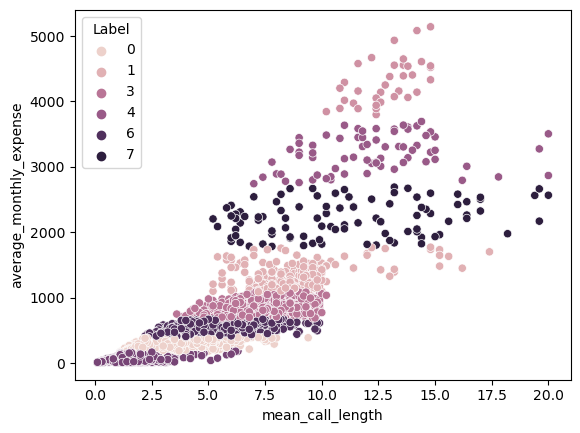

In [96]:
sns.scatterplot(data=df_clust, x='mean_call_length', y='average_monthly_expense', hue='Label')

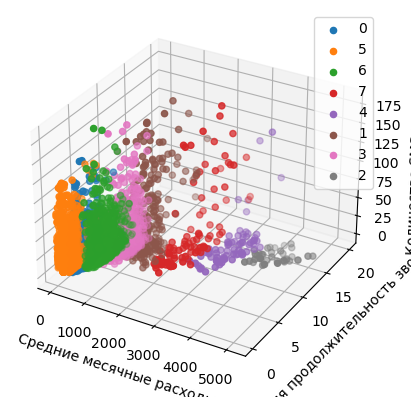

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

clusters = df_clust['Label'].unique()

for cluster in clusters:
    cluster_data = df_clust[df_clust['Label'] == cluster]
    x = cluster_data['average_monthly_expense']
    y = cluster_data['mean_call_length']
    z = cluster_data['sms_month']
    ax.scatter(x, y, z, marker='o', label=cluster)

ax.set_xlabel('Средние месячные расходы')
ax.set_ylabel('Средняя продолжительность звонков')
ax.set_zlabel('Количество SMS за месяц')
ax.legend()


<Axes: xlabel='sms_month', ylabel='average_monthly_expense'>

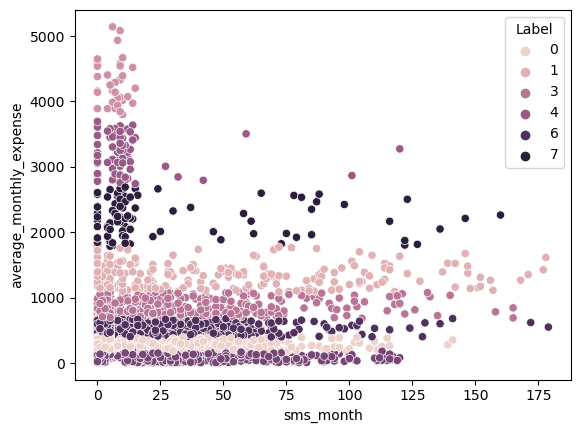

In [112]:
sns.scatterplot(data=df_clust, x='sms_month', y='average_monthly_expense', hue='Label')

<Axes: xlabel='daily_calls_month', ylabel='average_monthly_expense'>

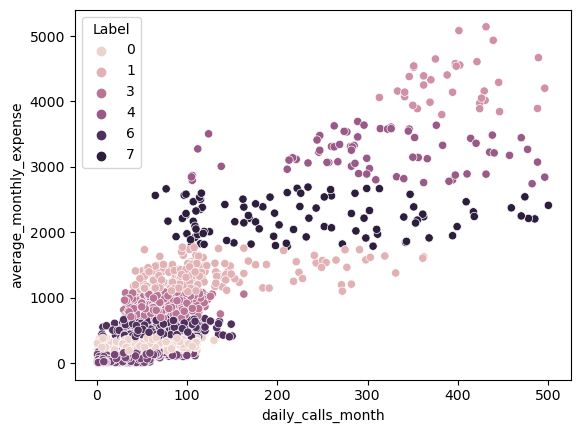

In [115]:
sns.scatterplot(data=df_clust, x='daily_calls_month', y='average_monthly_expense', hue='Label')